# Homework 1 - Exercise 1

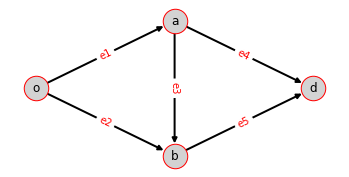

In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.flow import edmonds_karp
%matplotlib inline

# creation graph
G = nx.DiGraph()
G.add_edges_from([("o","a"), ("o","b"), ("a","b"), ("a","d"), ("b","d")])

# draw Graph
fig, ax = plt.subplots(figsize=(6,3))

pos = {"o":[-1,0], "a":[0,1], "b":[0,-1], "d":[1,0]}
labels = {("o","a"): "e1", ("o","b"): "e2", ("a","b"): "e3", ("a","d"): "e4", ("b","d"): "e5"}

nx.draw_networkx_edge_labels(G,  pos, edge_labels = labels, font_size = 10, font_color='red', ax = ax)

nx.draw(G, pos, node_size = 600, font_size=12, node_color='lightgray', with_labels=True, width=2, edge_color = 'black', edgecolors='red', ax=ax)

plt.savefig("plot1.1.svg", format="svg")

**B)** Where should 1 unit of additional capacity be allocated in order to maximize the feasible throughput from o to d

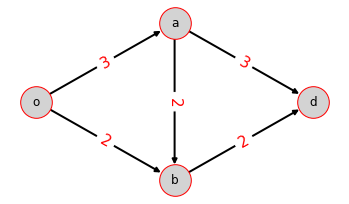

In [10]:
# add capacities
G["o"]["a"]['capacity'] = 3
G["o"]["b"]['capacity'] = 2
G["a"]["b"]['capacity'] = 2
G["a"]["d"]['capacity'] = 3
G["b"]["d"]['capacity'] = 2

#draw Graph
fig, ax = plt.subplots(figsize=(6,3.5))

nx.draw_networkx_edge_labels(G,pos,edge_labels={("o","a"): '3', ("o","b"): '2', ("a","b"): '2', ("a","d"): '3', ("b","d"):'2'}, font_size = 15, font_color='red', ax = ax)
nx.draw(G, pos, node_size = 1000, font_size=12, node_color='lightgray', with_labels=True, width=2, edge_color = 'black', edgecolors='red', ax=ax)
plt.savefig("plot1.2.svg", format="svg")

**C)** Where should 2 units of additional capacity be allocated in order to maximize the feasible throughput from o to d? Compute all the optimal capacity allocations for this case and the optimal throughput.

In [16]:
edges = nx.get_edge_attributes(G, "capacity")
print("list of edges: ", edges)

#compute all possible combinationon how to distribute the capacities among all edges
allCombination = list()

for a in range(len(edges)):
    for b in range(len(edges)):
        tmp = np.zeros(len(edges), dtype = "int32")
        tmp[a] += 1
        tmp[b] += 1
        allCombination.append(tmp)

#remove duplicates
allCombination = np.unique(allCombination, axis= 0 )
        
optimalCombinationsList = list()
maxFlowFound = 0

# current max-flow of the Graph
flow_value, flow_dict  = nx.algorithms.flow.maximum_flow(G,"o","d")

for combination in allCombination:
    for e_dict, e_value in edges.items():
        for i in range(len(edges)):
            
            # add the capacities to all edges
            pos = list(edges.keys()).index(e_dict)
            G[e_dict[0]][e_dict[1]]['capacity'] = int(e_value) + combination[pos]
            
            # calculate new max-flow of graph with modified capacities
            new_flow_value, new_flow_dict  = nx.algorithms.flow.maximum_flow(G,"o","d")
    
    #update list of best combination
    if(maxFlowFound <= new_flow_value and new_flow_value > flow_value):
        maxFlowFound = new_flow_value
        optimalCombinationsList.append(combination)
        
    G[e_dict[0]][e_dict[1]]['capacity'] = int(e_value)

print(maxFlowFound)

optimalCombinationsList

list of edges:  {('o', 'a'): 7, ('o', 'b'): 2, ('a', 'b'): 2, ('a', 'd'): 3, ('b', 'd'): 2}
7


[array([0, 0, 0, 0, 2]), array([0, 0, 0, 1, 1]), array([0, 0, 0, 2, 0])]

**D)** Where should 4 units of additional capacity be allocated in order to maximize the feasible throughput from o to d? Compute all the optimal capacity allocations for this case. Among the optimal allocations, select the allocation that maximizes
the sum of the cut capacities.

In [14]:
#compute all possible combinationon how to distribute the capacities among all edges
allCombination = list()

for a in range(len(edges)):
    for b in range(len(edges)):
        for c in range(len(edges)):
            for d in range(len(edges)):
                tmp = np.zeros(len(edges), dtype = "int32")
                tmp[a] += 1
                tmp[b] += 1
                tmp[c] += 1
                tmp[d] += 1
                allCombination.append(tmp)

#remove duplicates
allCombination = np.unique(allCombination, axis= 0 )
len(allCombination)

70

In [15]:
edges = nx.get_edge_attributes(G, "capacity")
print("list of edges: ", edges)

optimalCombinationsList = list()
maxFlowFound = 0

# current max-flow of the Graph
flow_value, flow_dict  = nx.algorithms.flow.maximum_flow(G,"o","d")

for combination in allCombination:
    for e_dict, e_value in edges.items():
        for i in range(len(edges)):
            
            # add the capacities to all edges
            pos = list(edges.keys()).index(e_dict)
            G[e_dict[0]][e_dict[1]]['capacity'] = int(e_value) + combination[pos]
            
            # calculate new max-flow of graph with modified capacities
            new_flow_value, new_flow_dict  = nx.algorithms.flow.maximum_flow(G,"o","d")
    
    #update list of best combination on best Max-Flow
    if(maxFlowFound <= new_flow_value and new_flow_value > flow_value and new_flow_value == 7):
        maxFlowFound = new_flow_value
        optimalCombinationsList.append(combination)
       
    G[e_dict[0]][e_dict[1]]['capacity'] = int(e_value)

print(maxFlowFound)
optimalCombinationsList

list of edges:  {('o', 'a'): 3, ('o', 'b'): 2, ('a', 'b'): 2, ('a', 'd'): 3, ('b', 'd'): 2}
7


[array([0, 2, 0, 0, 2]),
 array([1, 1, 0, 0, 2]),
 array([1, 1, 0, 1, 1]),
 array([2, 0, 0, 0, 2]),
 array([2, 0, 0, 1, 1]),
 array([2, 0, 0, 2, 0])]